In [56]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer
# from qiskit.providers.aer import QasmSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram
%matplotlib inline

import numpy as np

sv_sim = Aer.get_backend('statevector_simulator')
aer_sim = Aer.get_backend('aer_simulator')

In [46]:
def run_circuit(qc, backend, num_shots=1024):
    result = execute(qc, backend, shots=num_shots).result()
    return dict(result.get_counts())

In [44]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.x(2).c_if(1,0)
qc.measure(2,2)
qc.draw()

┌───┐     ┌─┐                 
q_0: ┤ H ├──■──┤M├─────────────────
     └───┘┌─┴─┐└╥┘┌─┐              
q_1: ─────┤ X ├─╫─┤M├──────────────
          └───┘ ║ └╥┘   ┌───┐   ┌─┐
q_2: ───────────╫──╫────┤ X ├───┤M├
                ║  ║    └─╥─┘   └╥┘
                ║  ║ ┌────╨────┐ ║ 
c: 3/═══════════╩══╩═╡ c_1=0x0 ╞═╩═
                0  1 └─────────┘ 2

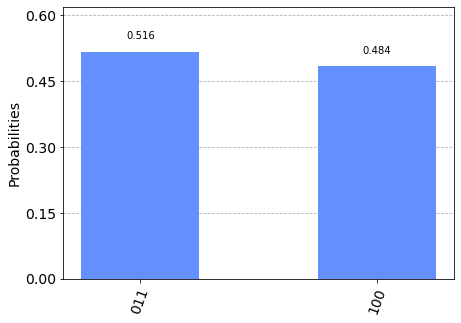

In [55]:
counts = run_circuit(qc, aer_sim)
plot_histogram(counts)

# Remember that from left to right order is MSB to LSB in qiskit

In [238]:
def measure(qc, idx, qbit, cbit, backend, num_shots=1024):
    if idx == 0:
        return 1
    elif idx == 1:
        qc.h(qbit)
    elif idx == 2:
        qc.rx(np.pi/2, qbit)
    elif idx == 3:
        None
    else:
        raise ValueError('Only 0,1,2,3 are valid idx')
    
    qc.measure(qbit, cbit)
    counts = run_circuit(qc, backend, num_shots=num_shots)
    
    index = 0
    for bit in qc.clbits:
        if bit == cbit:
            break
        index += 1

#     print(index)

    expectation = 0

    for key in counts.keys():
        k = key.replace(' ', '')
        if k[-(index+1)] == '0':
            expectation += counts[key]
        else:
            expectation -= counts[key]
            
    return float(expectation)/num_shots

In [243]:
q = QuantumRegister(2)
c1 = ClassicalRegister(2)
c2 = ClassicalRegister(2)
qc = QuantumCircuit(q,c1,c2)
# qc.x(0)
qc.h(q[0])
qbit = q[0]
cbit = c2[0]

# qc.measure(qbit, cbit)

# print(cbit)
meas = measure(qc, 3, qbit, cbit, aer_sim)
print(meas)
# plot_histogram(counts)

-0.013671875


In [218]:
qc.clbits

[Clbit(ClassicalRegister(2, 'c18'), 0),
 Clbit(ClassicalRegister(2, 'c18'), 1),
 Clbit(ClassicalRegister(2, 'c19'), 0),
 Clbit(ClassicalRegister(2, 'c19'), 1)]

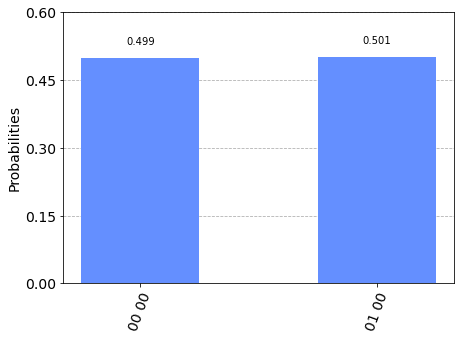

In [220]:
counts = run_circuit(qc, aer_sim)
plot_histogram(counts)

In [224]:
index = 0
for bit in qc.clbits:
    if bit == cbit:
        break
    index += 1

print(index)

for key in counts.keys():
    k = key.replace(' ', '')
    print(k[-(index+1)])

2
0
1
